# UNEMPLOYMENT ANALYSIS

In [35]:
import numpy as np
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

df=pd.read_csv('Unemployment in India.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [37]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [38]:
df.dropna(inplace=True)


## FEATURE ENGINEERING

In [39]:
df['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [40]:
#Removing the spaces in the column variables!!
df.columns=df.columns.str.replace(' ','')

In [41]:
#Converting the Date column to datetime format
df['Date']=pd.to_datetime(df['Date'])

In [42]:
df['Frequency'].value_counts()

Monthly     381
 Monthly    359
Name: Frequency, dtype: int64

In [43]:
df['Frequency']=df['Frequency'].str.replace(' ','')

In [44]:
df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

## EDA 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               740 non-null    object        
 1   Date                                 740 non-null    datetime64[ns]
 2   Frequency                            740 non-null    object        
 3   EstimatedUnemploymentRate(%)         740 non-null    float64       
 4   EstimatedEmployed                    740 non-null    float64       
 5   EstimatedLabourParticipationRate(%)  740 non-null    float64       
 6   Area                                 740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


## Univariate Analysis of data 

<Axes: xlabel='count', ylabel='Region'>

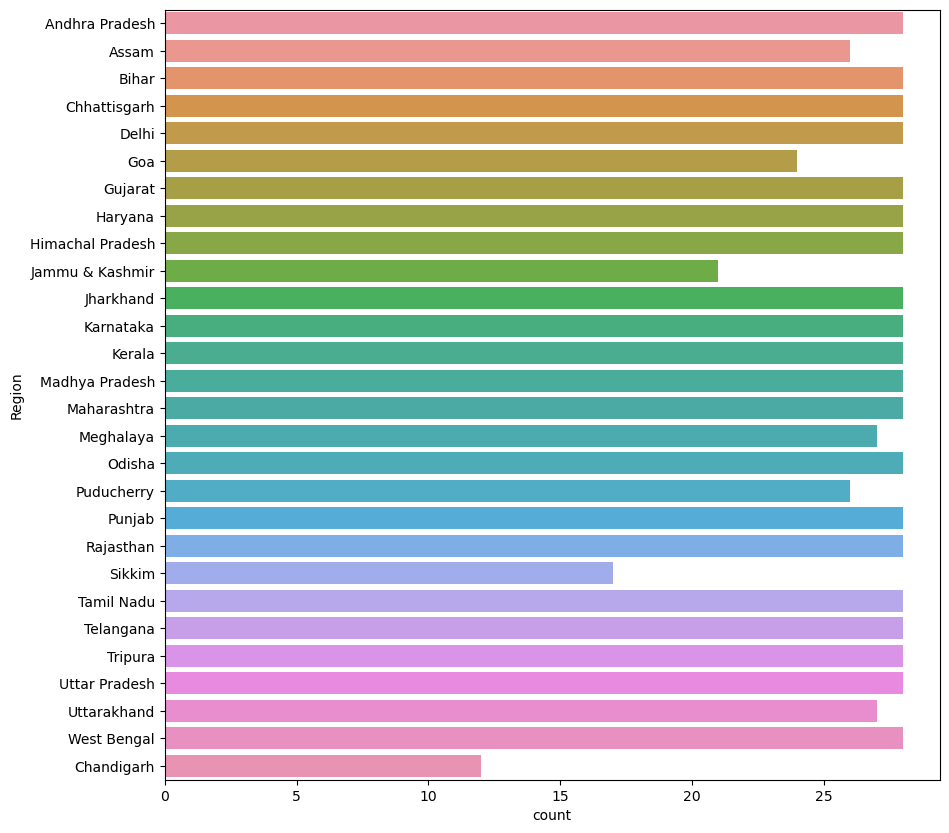

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.countplot(data=df,y='Region')

<Axes: >

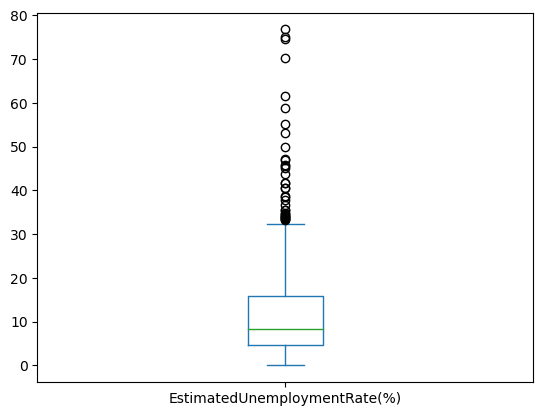

In [47]:
df['EstimatedUnemploymentRate(%)'].plot(kind='box')

<Axes: ylabel='Density'>

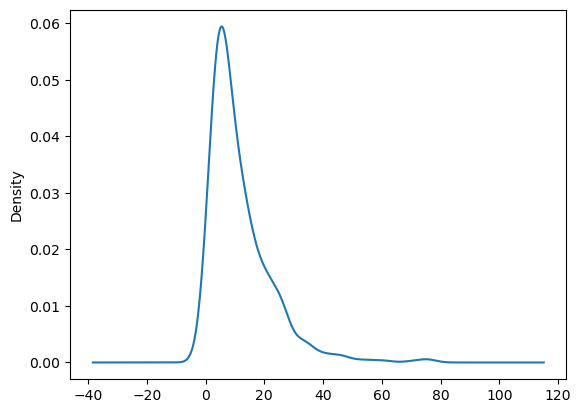

In [48]:
df['EstimatedUnemploymentRate(%)'].plot(kind='kde')

In [49]:
print('Minimum Unemployment Rate:',df['EstimatedUnemploymentRate(%)'].min(),'%')
print('Maximum Unemployment Rate:',df['EstimatedUnemploymentRate(%)'].max(),'%')
print('Average Unemployment Rate:',df['EstimatedUnemploymentRate(%)'].median(),'% -',df['EstimatedUnemploymentRate(%)'].mean(),'%')

Minimum Unemployment Rate: 0.0 %
Maximum Unemployment Rate: 76.74 %
Average Unemployment Rate: 8.35 % - 11.787945945945946 %


<Axes: >

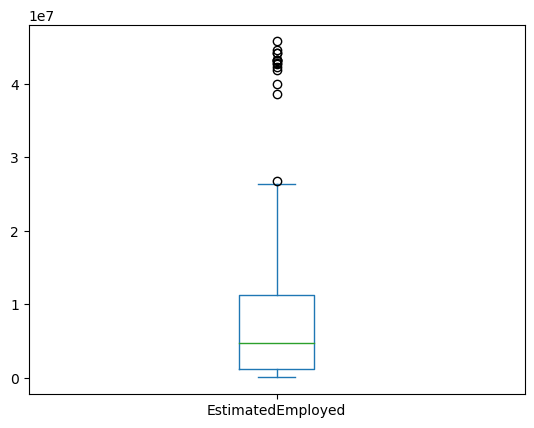

In [50]:
df['EstimatedEmployed'].plot(kind='box')

<Axes: ylabel='Density'>

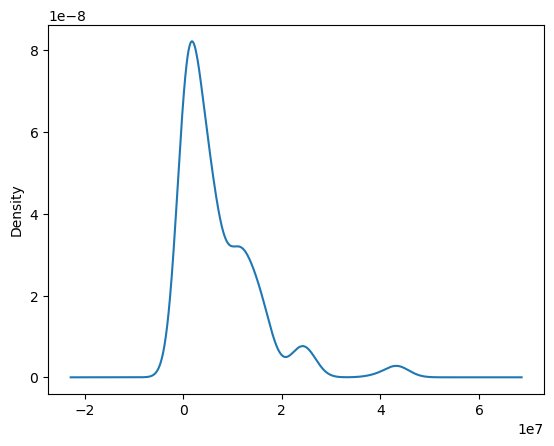

In [51]:
df['EstimatedEmployed'].plot(kind='kde')

In [52]:
print('Minimum Employed:',df['EstimatedEmployed'].min())
print('Maximum Employed:',df['EstimatedEmployed'].max())
print('Average Employed:',int(df['EstimatedEmployed'].median()),'-',int(df['EstimatedEmployed'].mean()))

Minimum Employed: 49420.0
Maximum Employed: 45777509.0
Average Employed: 4744178 - 7204460


<Axes: >

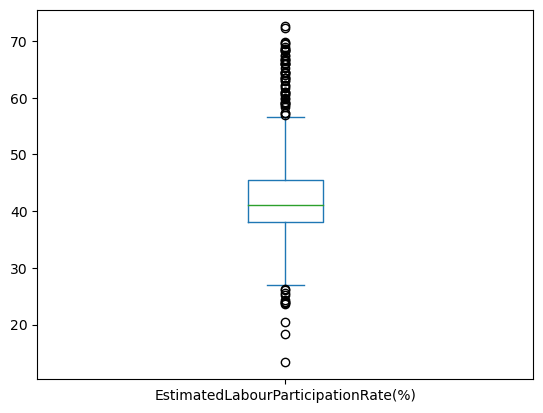

In [53]:
df['EstimatedLabourParticipationRate(%)'].plot(kind='box')

<Axes: ylabel='Density'>

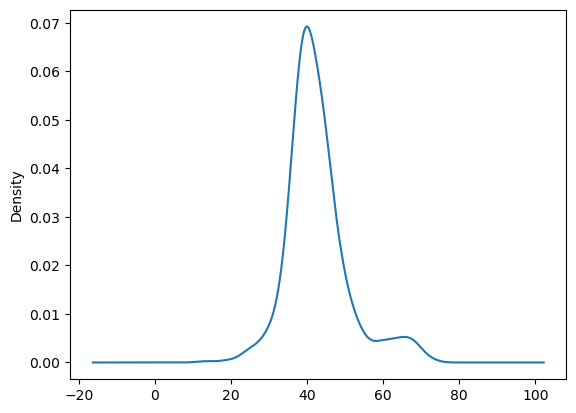

In [54]:
df['EstimatedLabourParticipationRate(%)'].plot(kind='kde')

In [55]:
print('Minimum Labour Participation Rate:',df['EstimatedLabourParticipationRate(%)'].min(),'%')
print('Maximum Labour Participation Rate:',df['EstimatedLabourParticipationRate(%)'].max(),'%')
print('Average Labour Participation Rate:',df['EstimatedLabourParticipationRate(%)'].median(),'% -',df['EstimatedLabourParticipationRate(%)'].mean(),'%')

Minimum Labour Participation Rate: 13.33 %
Maximum Labour Participation Rate: 72.57 %
Average Labour Participation Rate: 41.16 % - 42.630121621621626 %


<Axes: >

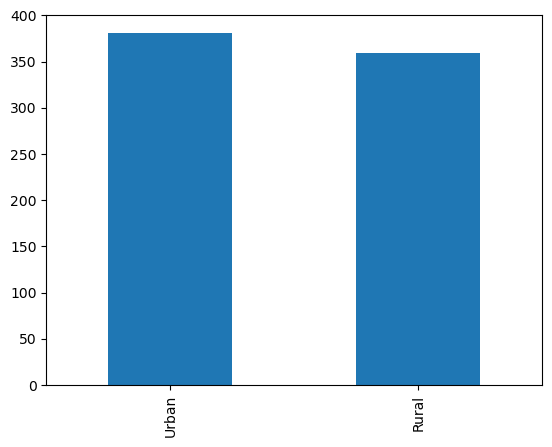

In [56]:
df['Area'].value_counts().plot(kind='bar')

##     Analysis for Every state!! 

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               740 non-null    object        
 1   Date                                 740 non-null    datetime64[ns]
 2   Frequency                            740 non-null    object        
 3   EstimatedUnemploymentRate(%)         740 non-null    float64       
 4   EstimatedEmployed                    740 non-null    float64       
 5   EstimatedLabourParticipationRate(%)  740 non-null    float64       
 6   Area                                 740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [79]:
#functions for min, avg, max employment/ unemployment rates!!

def EstimUnempRate(df):
    print('Minimum Unemployment Rate in',state,' is:',df['EstimatedUnemploymentRate(%)'].min(),'%')
    print('Maximum Unemployment Rate in',state,' is:',df['EstimatedUnemploymentRate(%)'].max(),'%')
    print('Average Unemployment Rate in',state,' is:',df['EstimatedUnemploymentRate(%)'].median(),'% -',df['EstimatedUnemploymentRate(%)'].mean(),'%')
    plt.figure(figsize=(5,5))
    sns.boxplot(x='EstimatedUnemploymentRate(%)',y='Region',hue='Area',data=df)
    print('\n\n')

    
def Estemp(df):
    print('Minimum Employed in',state,' is:',df['EstimatedEmployed'].min())
    print('Maximum Employed in',state,' is:',df['EstimatedEmployed'].max())
    print('Average Employed in',state,' is:',int(df['EstimatedEmployed'].median()),'-',int(df['EstimatedEmployed'].mean()))
    plt.figure(figsize=(5,5))
    sns.boxplot(x='EstimatedEmployed',y='Region',hue='Area',data=df)
    print('\n\n')
   

def EstLabourPart(df):
    print('MinimumEstimated LabourParticipation Rate in',state,' is:',df['EstimatedLabourParticipationRate(%)'].min(),'%')
    print('Maximum Estimated Labour ParticipationRate in',state,' is:',df['EstimatedLabourParticipationRate(%)'].max(),'%')
    print('Average Estimated Labour ParticipationRate in',state,' is:',df['EstimatedLabourParticipationRate(%)'].median(),'% -',df['EstimatedLabourParticipationRate(%)'].mean(),'%')
    plt.figure(figsize=(5,5))
    sns.boxplot(x='EstimatedLabourParticipationRate(%)',y='Region',hue='Area',data=df)
    print('\n\n')    

Minimum Unemployment Rate in Andhra Pradesh  is: 0.85 %
Maximum Unemployment Rate in Andhra Pradesh  is: 32.3 %
Average Unemployment Rate in Andhra Pradesh  is: 5.404999999999999 % - 7.477142857142857 %



Minimum Unemployment Rate in Assam  is: 0.0 %
Maximum Unemployment Rate in Assam  is: 11.17 %
Average Unemployment Rate in Assam  is: 5.4350000000000005 % - 6.428076923076923 %



Minimum Unemployment Rate in Bihar  is: 8.87 %
Maximum Unemployment Rate in Bihar  is: 58.77 %
Average Unemployment Rate in Bihar  is: 15.01 % - 18.91821428571429 %



Minimum Unemployment Rate in Chhattisgarh  is: 0.0 %
Maximum Unemployment Rate in Chhattisgarh  is: 27.07 %
Average Unemployment Rate in Chhattisgarh  is: 8.265 % - 9.240357142857144 %



Minimum Unemployment Rate in Delhi  is: 9.33 %
Maximum Unemployment Rate in Delhi  is: 45.78 %
Average Unemployment Rate in Delhi  is: 15.02 % - 16.49535714285714 %



Minimum Unemployment Rate in Goa  is: 0.0 %
Maximum Unemployment Rate in Goa  is: 25.2 %
A

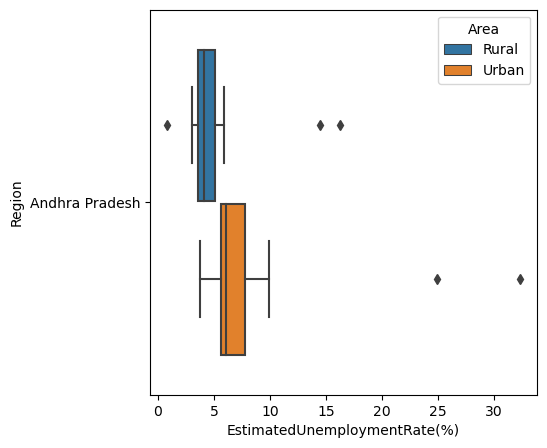

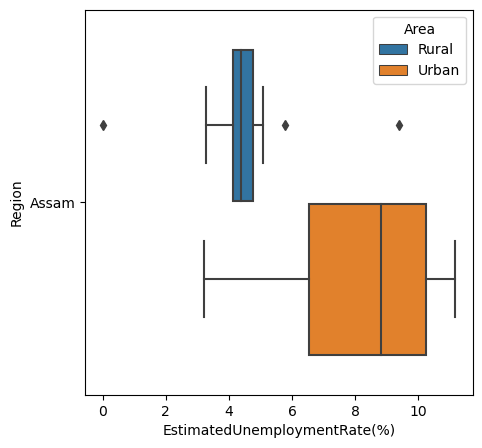

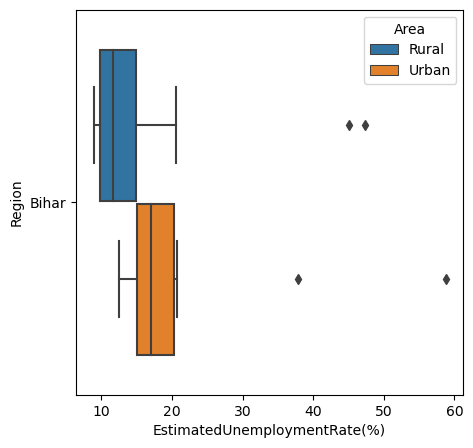

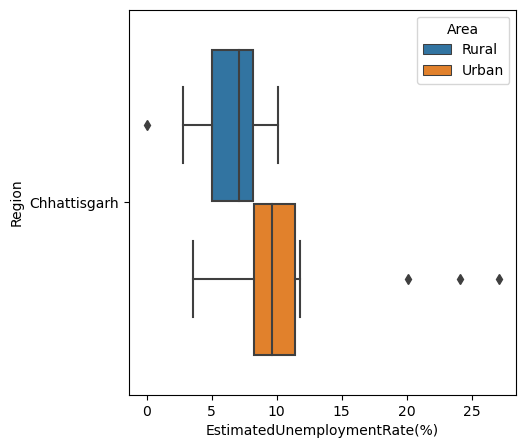

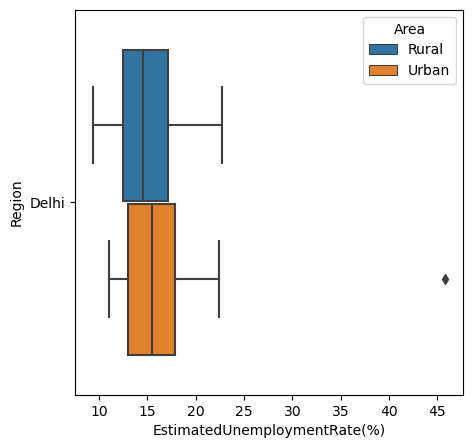

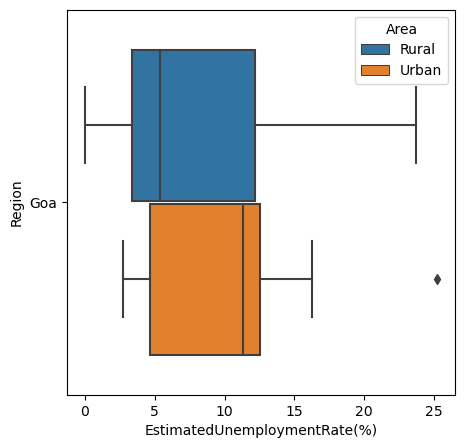

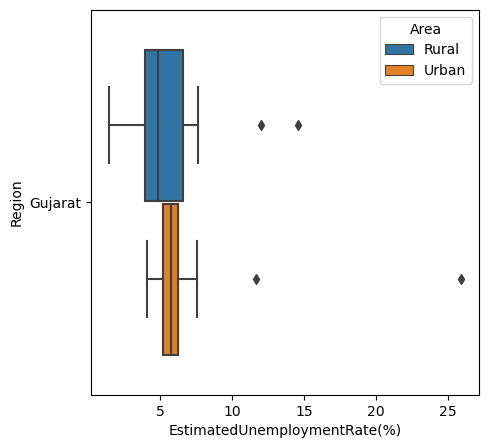

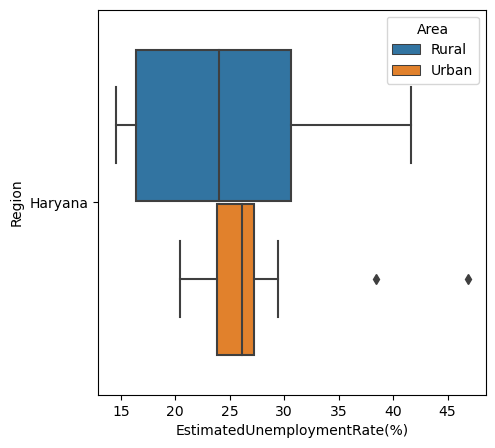

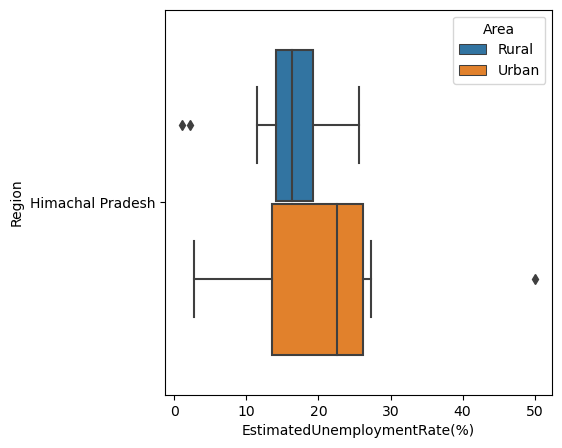

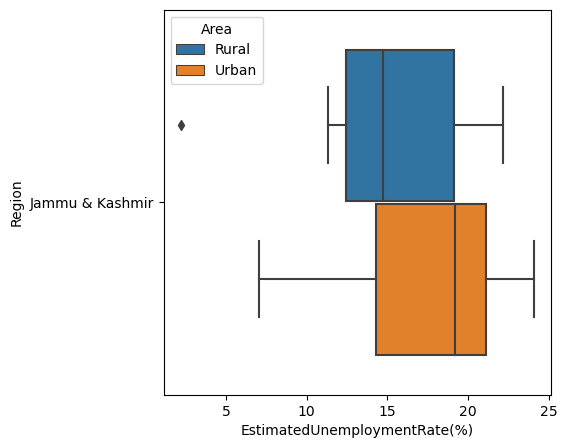

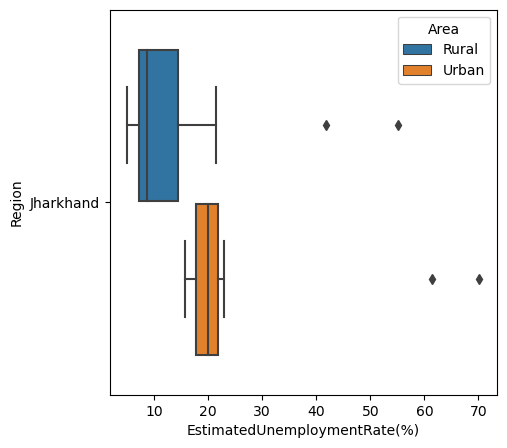

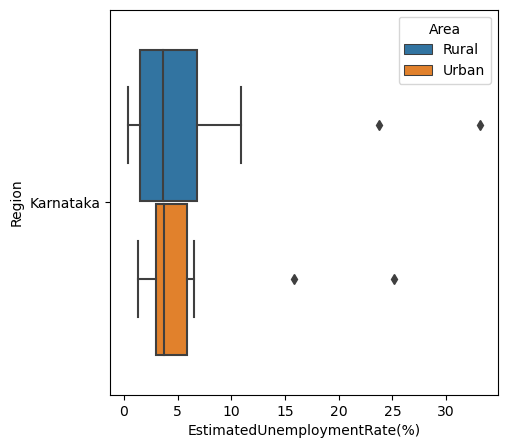

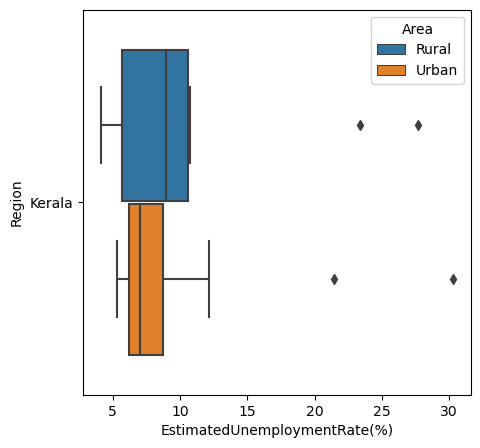

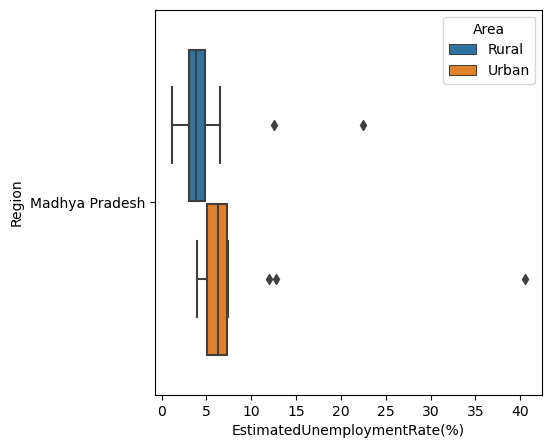

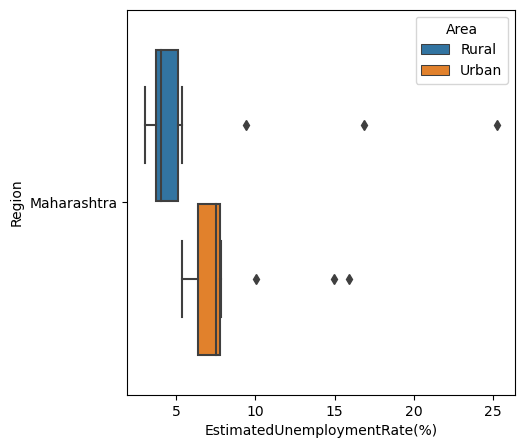

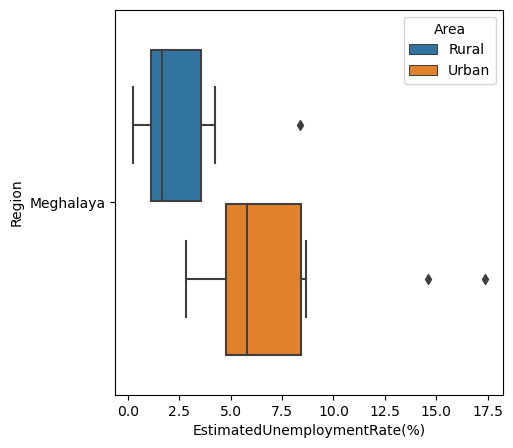

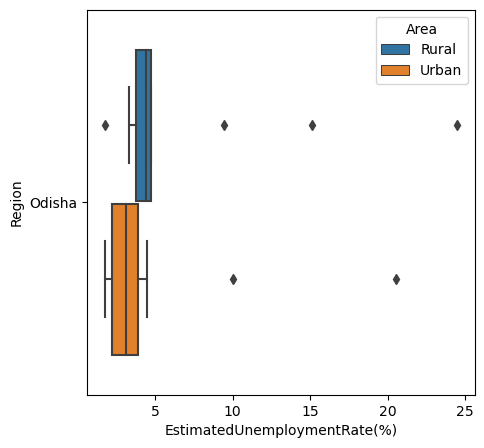

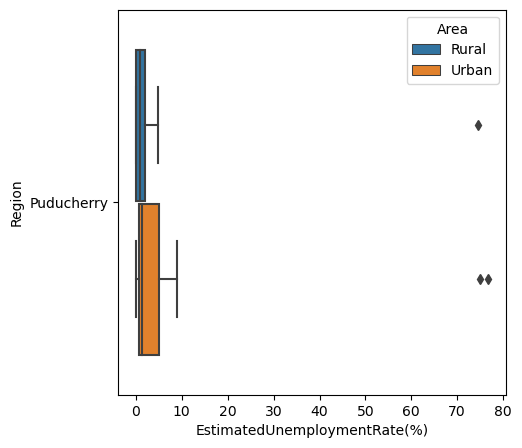

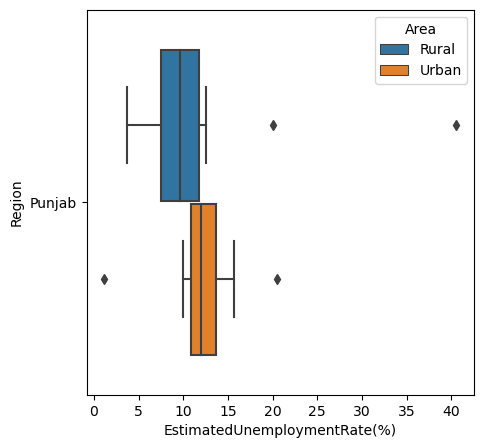

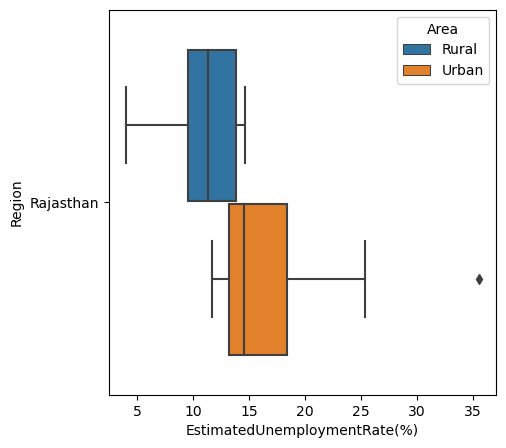

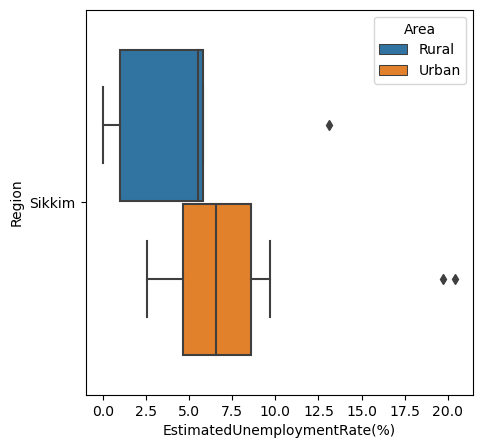

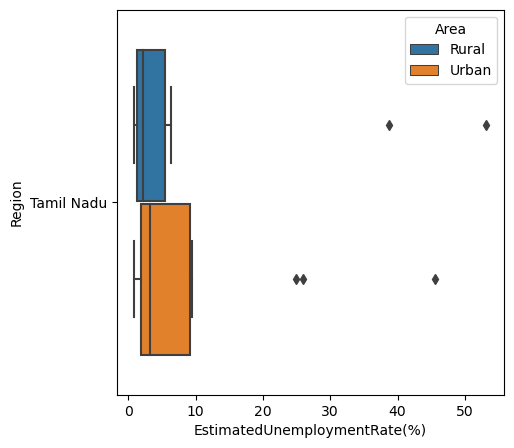

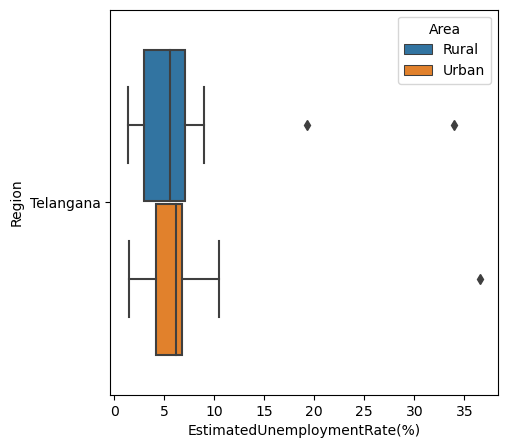

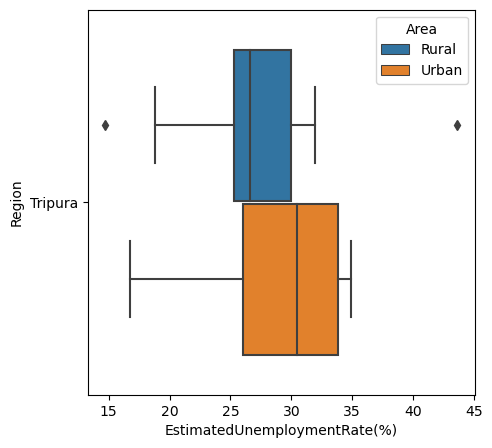

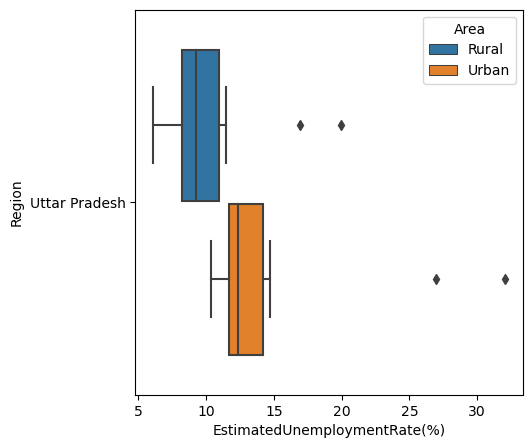

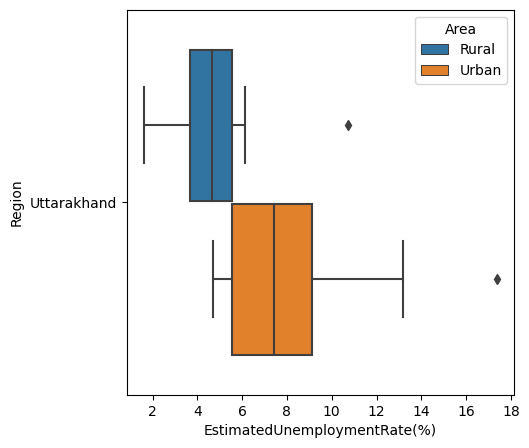

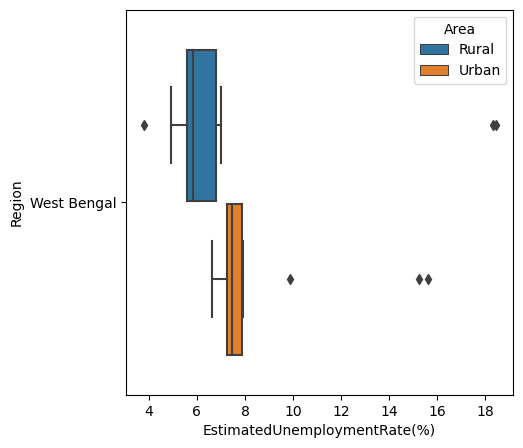

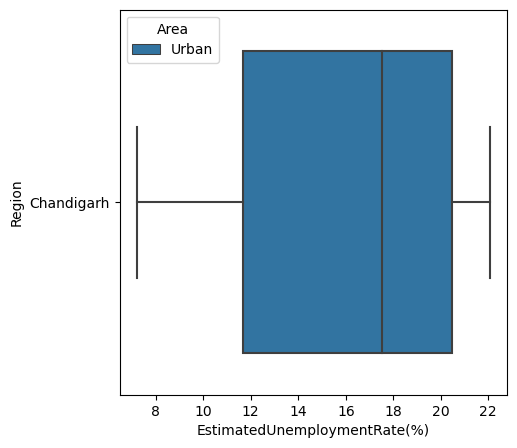

In [80]:
for state in df['Region'].unique():
        state_df=df[df['Region']==state]
        EstimUnempRate(state_df)
        

<Axes: xlabel='EstimatedUnemploymentRate(%)', ylabel='Region'>

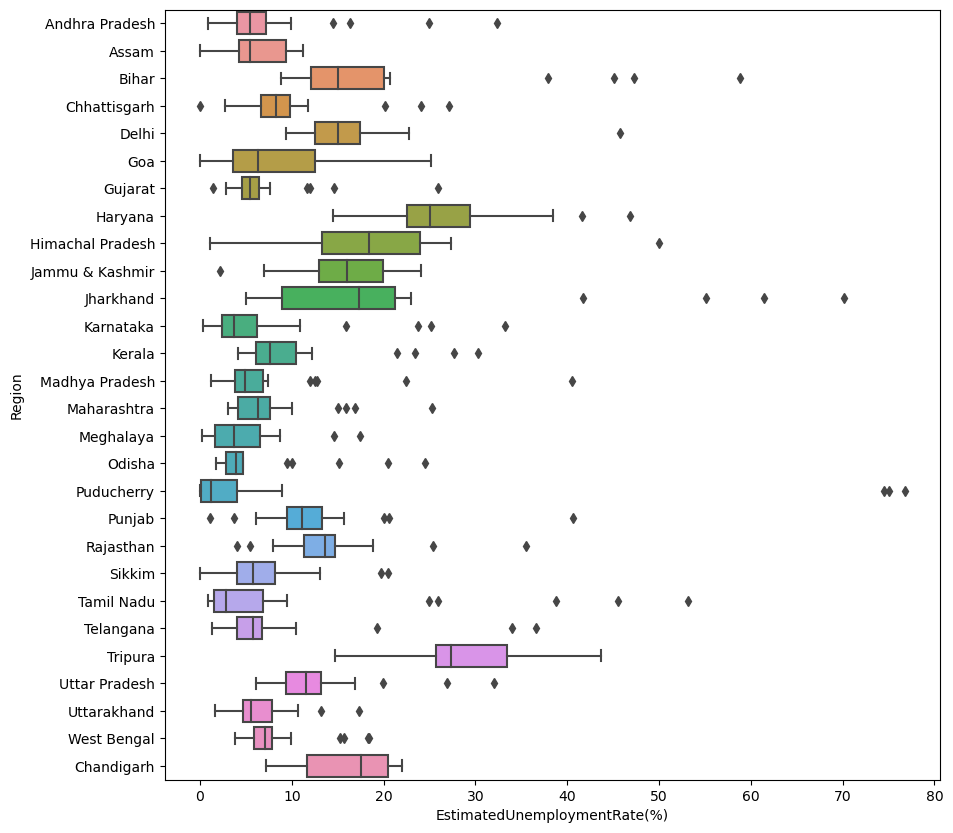

In [81]:
plt.figure(figsize=(10,10))
sns.boxplot(x='EstimatedUnemploymentRate(%)',y='Region',data=df)

Minimum Employed in Andhra Pradesh  is: 2544084.0
Maximum Employed in Andhra Pradesh  is: 15572975.0
Average Employed in Andhra Pradesh  is: 6873608 - 8154093



Minimum Employed in Assam  is: 1441722.0
Maximum Employed in Assam  is: 11749334.0
Average Employed in Assam  is: 1731070 - 5354772



Minimum Employed in Bihar  is: 1400962.0
Maximum Employed in Bihar  is: 24322330.0
Average Employed in Bihar  is: 8649591 - 12366189



Minimum Employed in Chhattisgarh  is: 1066126.0
Maximum Employed in Chhattisgarh  is: 7043840.0
Average Employed in Chhattisgarh  is: 3934763 - 4303498



Minimum Employed in Delhi  is: 112108.0
Maximum Employed in Delhi  is: 6030363.0
Average Employed in Delhi  is: 1261275 - 2627512



Minimum Employed in Goa  is: 128538.0
Maximum Employed in Goa  is: 318957.0
Average Employed in Goa  is: 213440 - 226308



Minimum Employed in Gujarat  is: 6072776.0
Maximum Employed in Gujarat  is: 14487815.0
Average Employed in Gujarat  is: 10679732 - 11402012



Minimum Empl

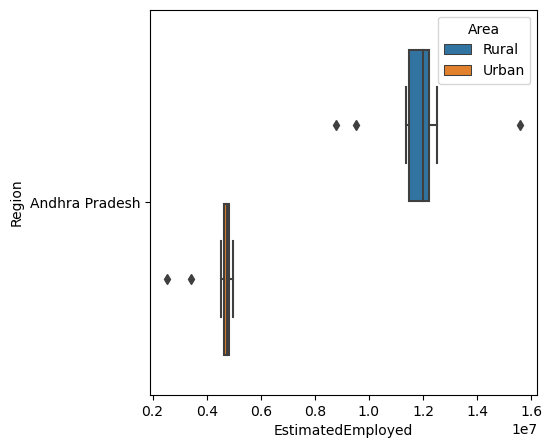

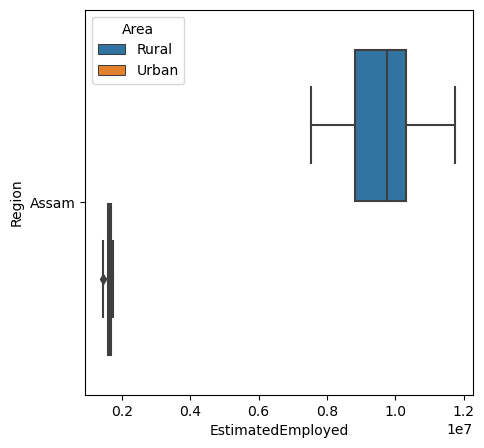

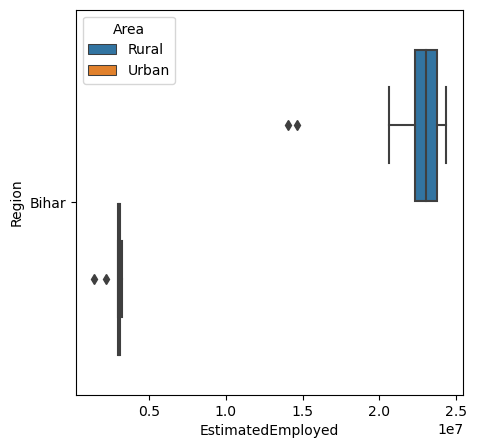

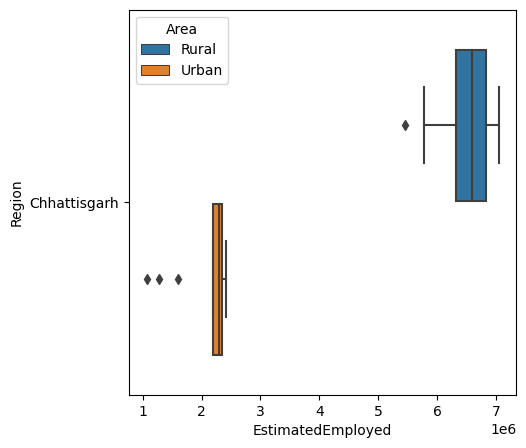

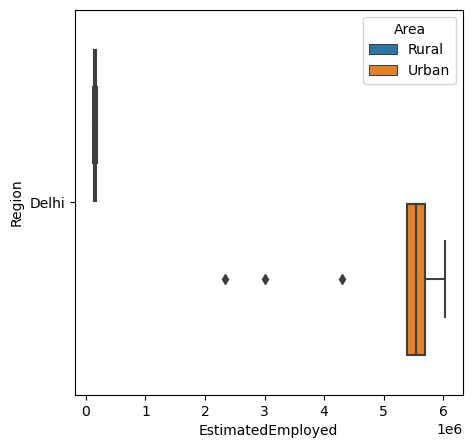

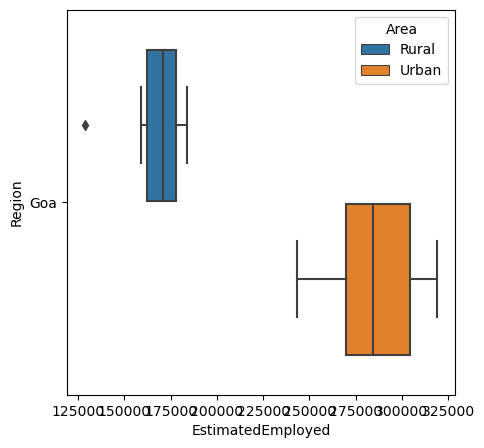

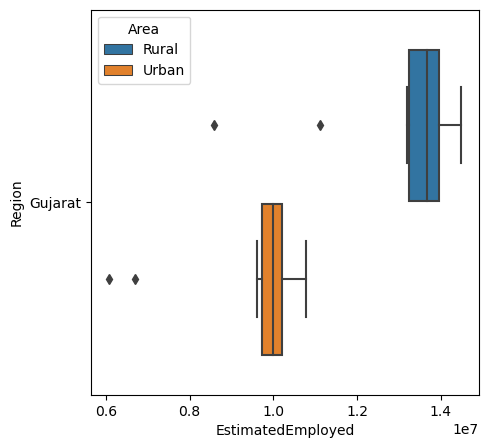

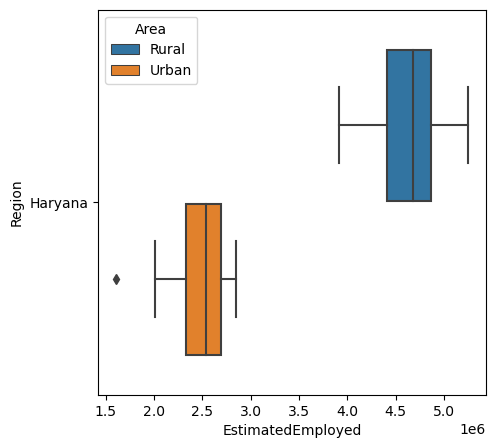

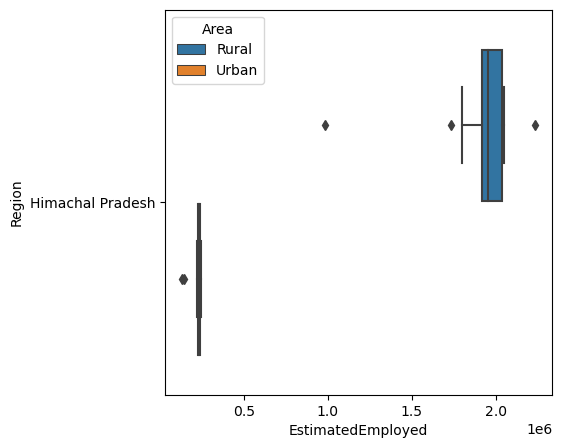

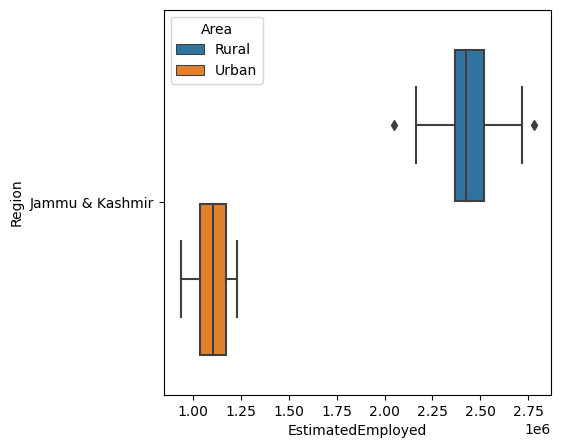

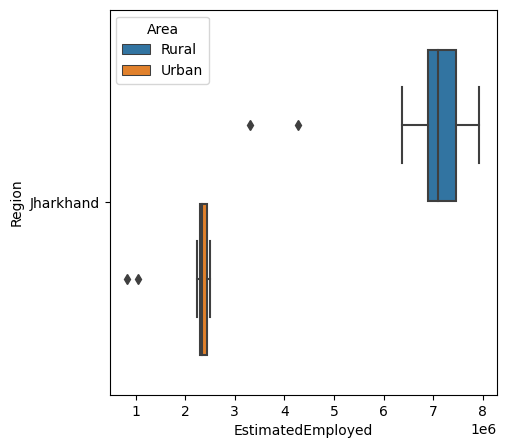

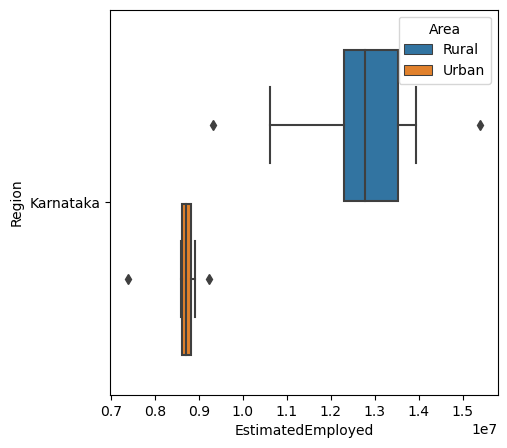

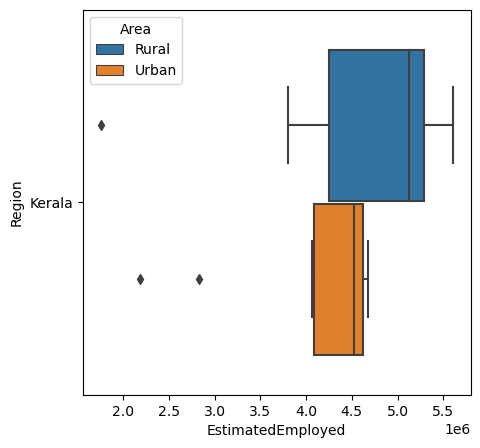

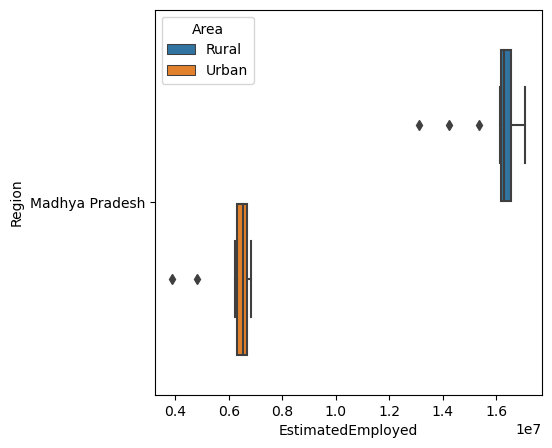

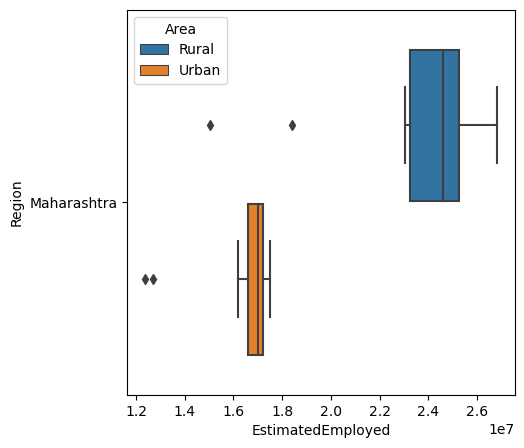

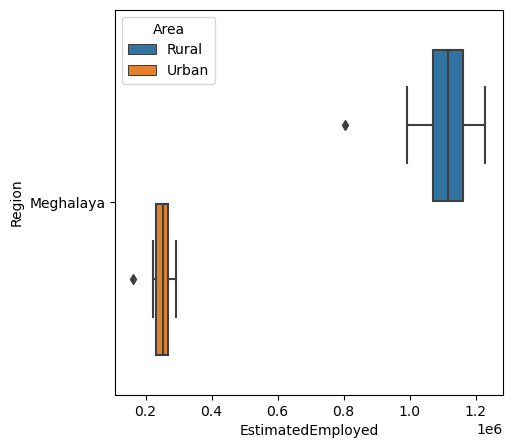

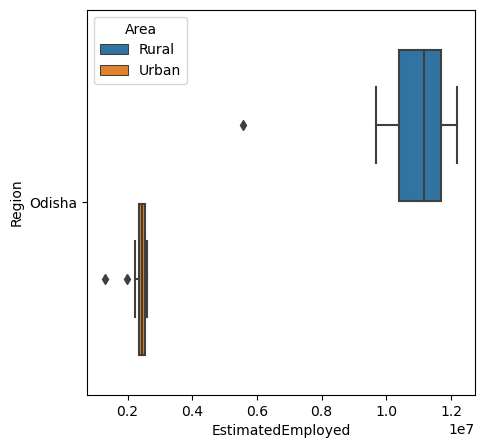

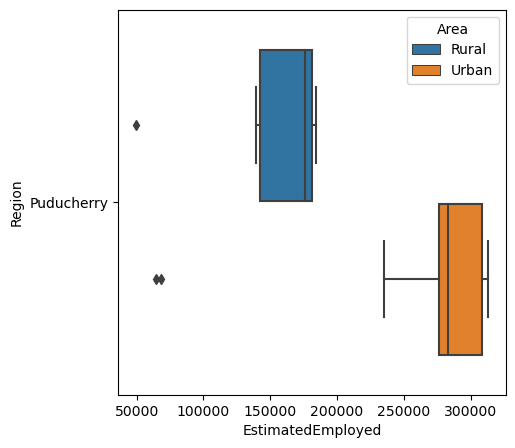

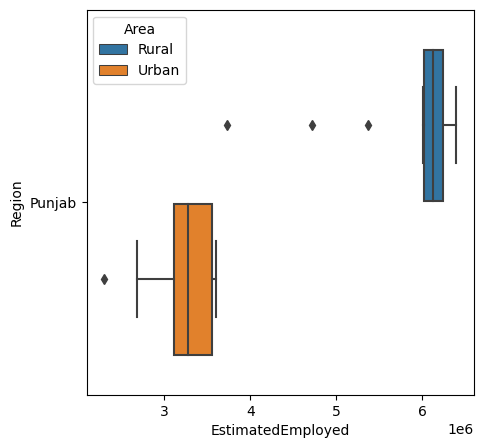

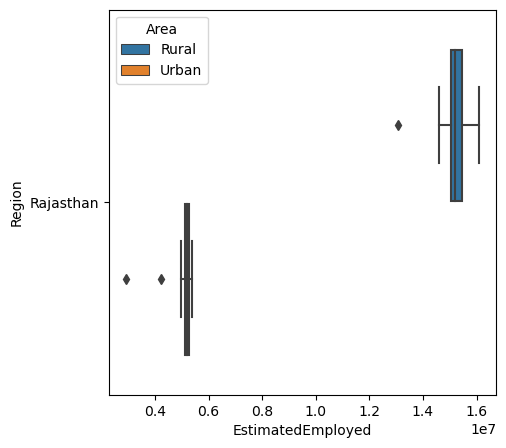

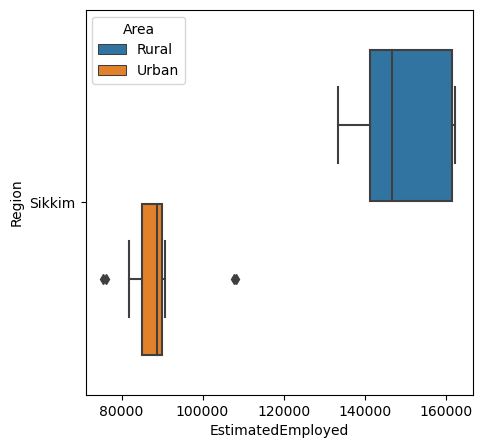

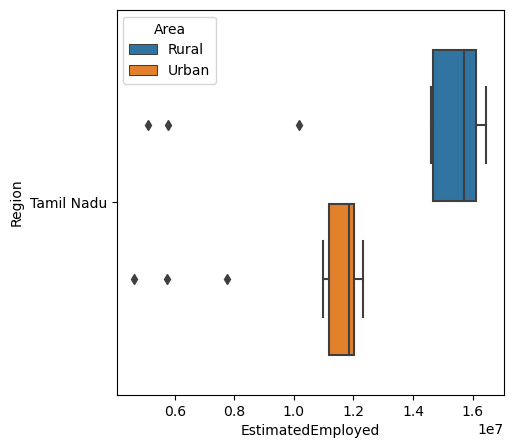

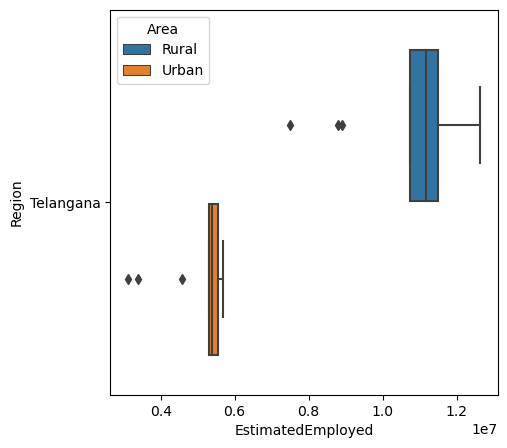

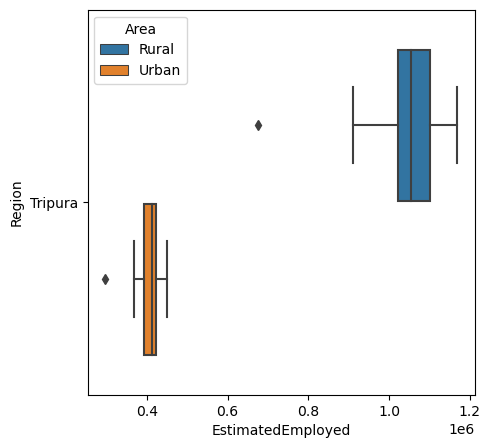

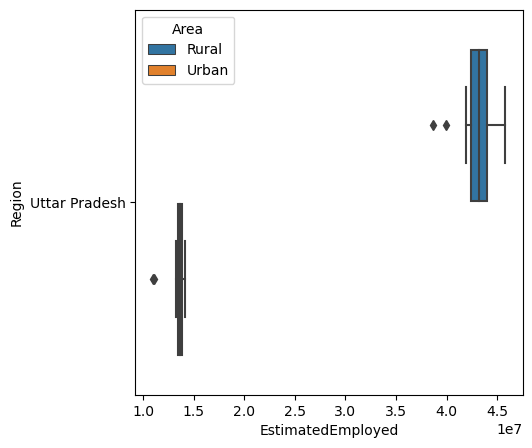

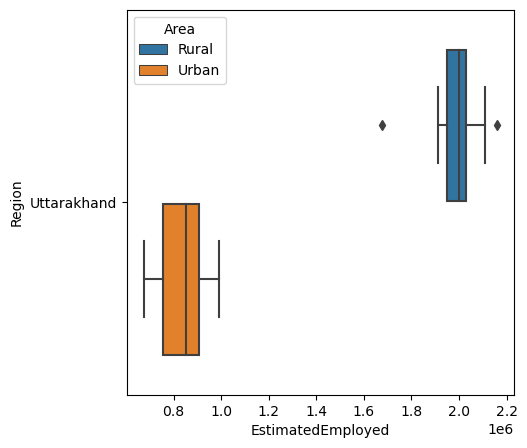

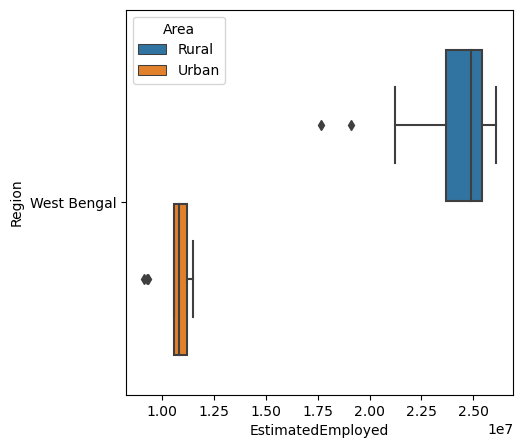

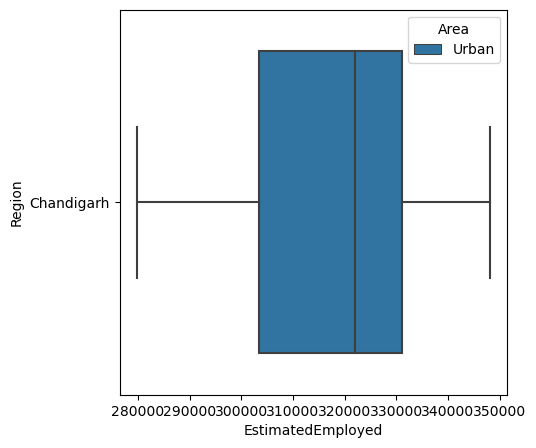

In [82]:
for state in df['Region'].unique():
        state_df=df[df['Region']==state]
        Estemp(state_df)
        

<Axes: xlabel='EstimatedEmployed', ylabel='Region'>

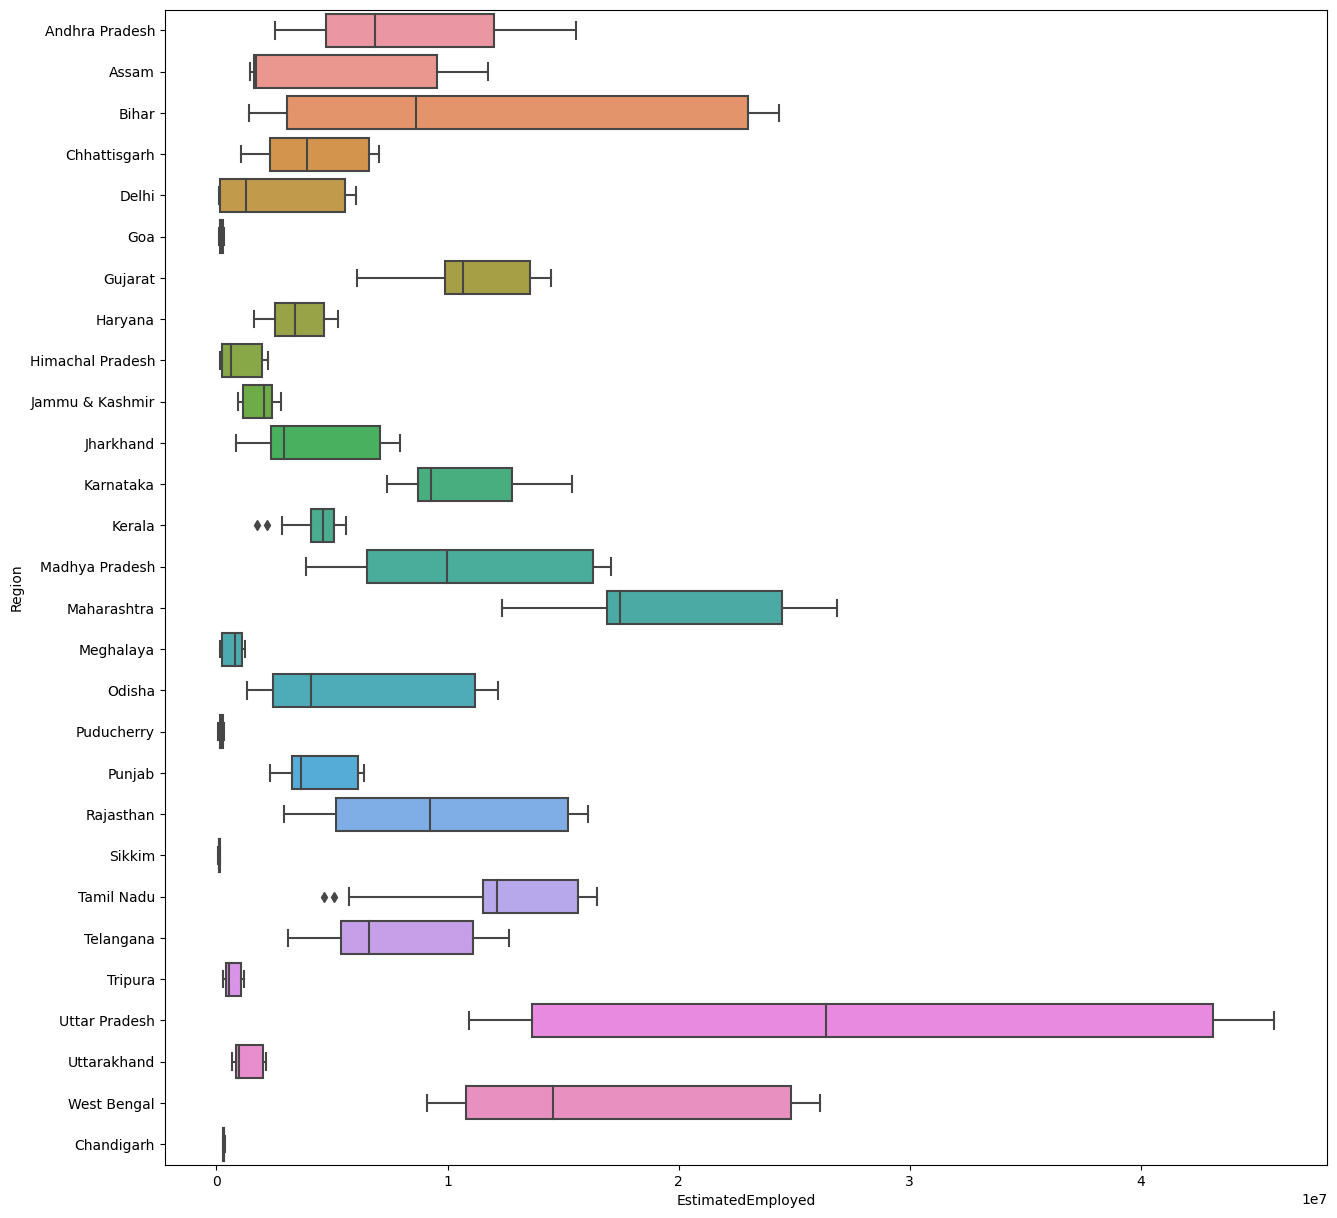

In [83]:
plt.figure(figsize=(15,15))
sns.boxplot(x='EstimatedEmployed',y='Region',data=df)

MinimumEstimated LabourParticipation Rate in Andhra Pradesh  is: 26.97 %
Maximum Estimated Labour ParticipationRate in Andhra Pradesh  is: 53.76 %
Average Estimated Labour ParticipationRate in Andhra Pradesh  is: 37.885 % - 39.37571428571429 %



MinimumEstimated LabourParticipation Rate in Assam  is: 34.38 %
Maximum Estimated Labour ParticipationRate in Assam  is: 57.39 %
Average Estimated Labour ParticipationRate in Assam  is: 44.29 % - 44.86846153846154 %



MinimumEstimated LabourParticipation Rate in Bihar  is: 34.94 %
Maximum Estimated Labour ParticipationRate in Bihar  is: 40.31 %
Average Estimated Labour ParticipationRate in Bihar  is: 38.405 % - 38.15392857142857 %



MinimumEstimated LabourParticipation Rate in Chhattisgarh  is: 24.06 %
Maximum Estimated Labour ParticipationRate in Chhattisgarh  is: 47.39 %
Average Estimated Labour ParticipationRate in Chhattisgarh  is: 44.345 % - 42.81071428571429 %



MinimumEstimated LabourParticipation Rate in Delhi  is: 23.59 %
Maximum E

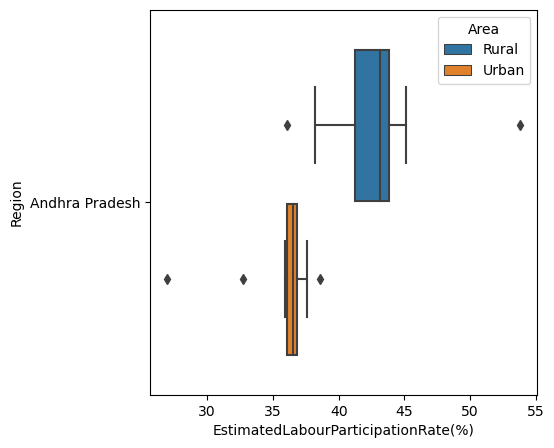

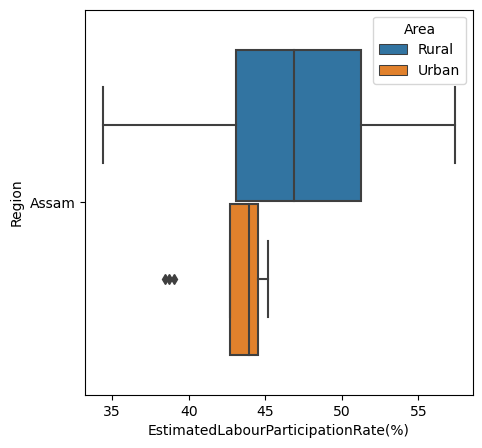

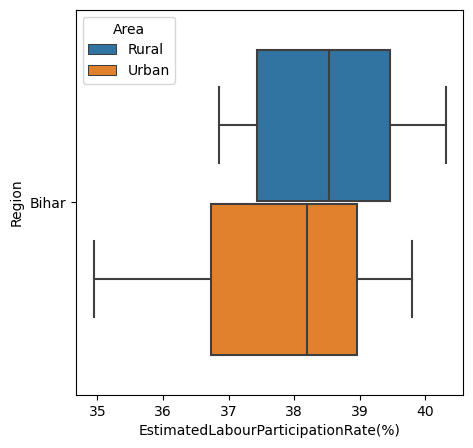

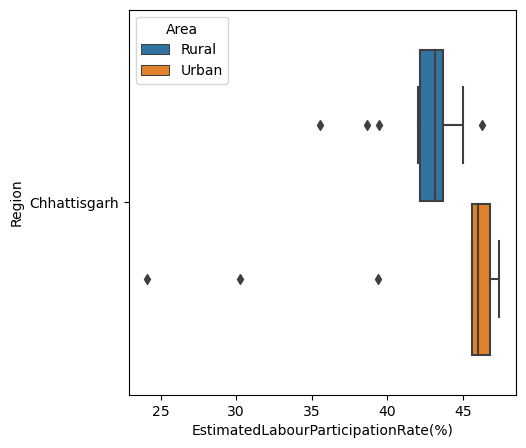

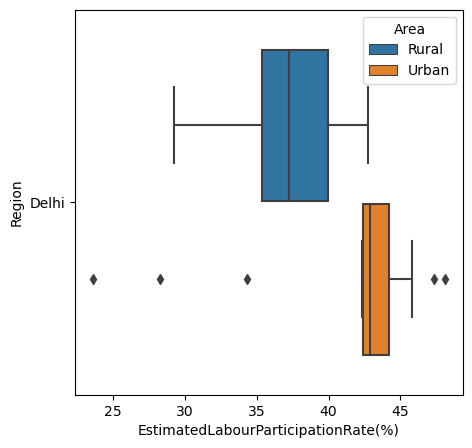

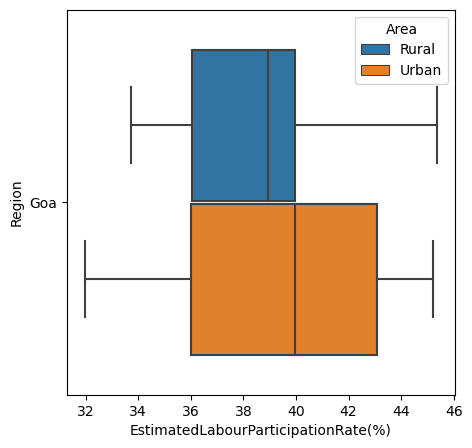

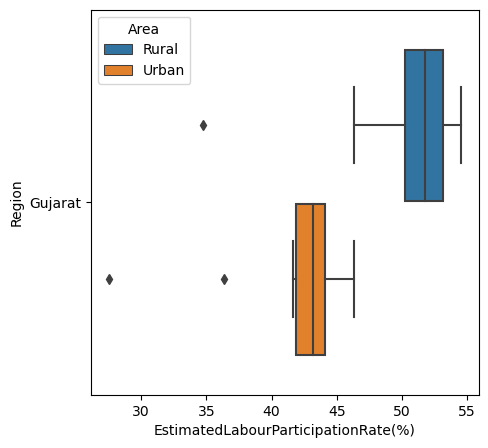

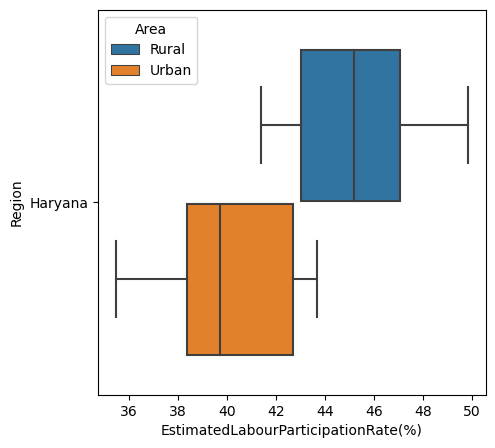

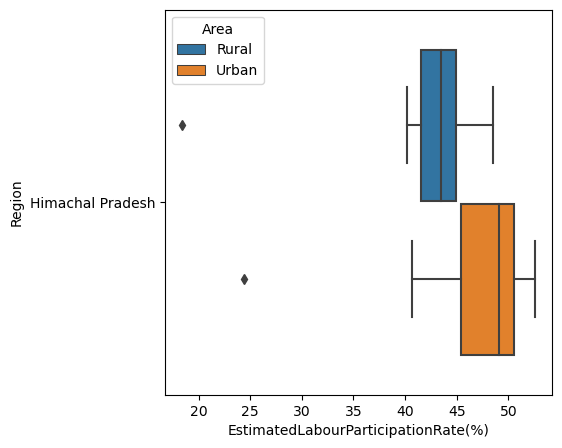

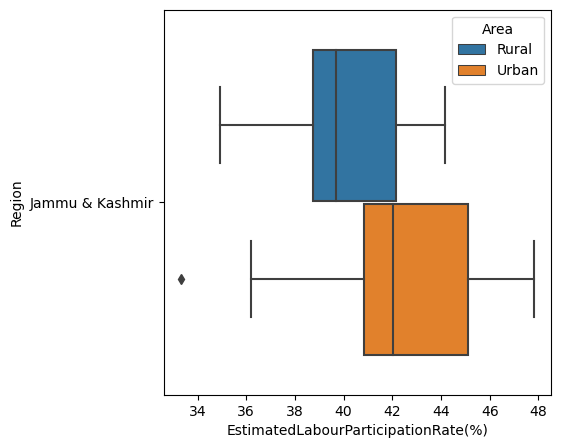

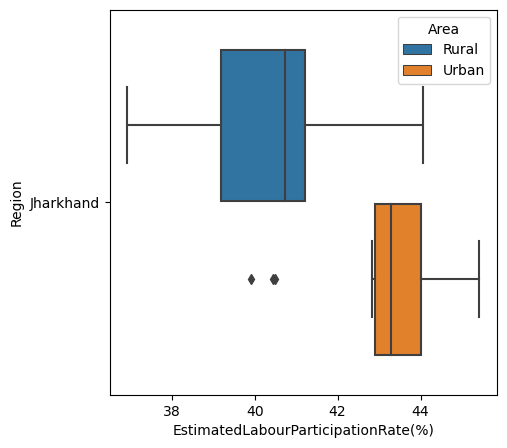

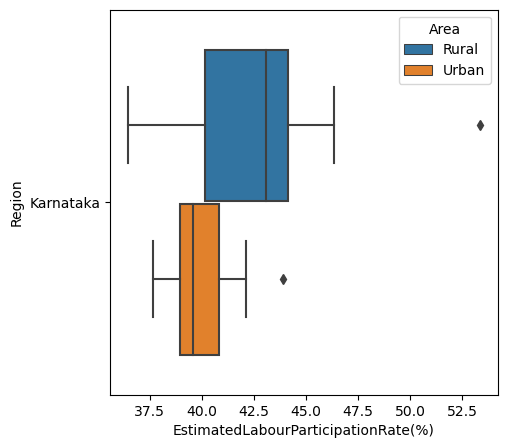

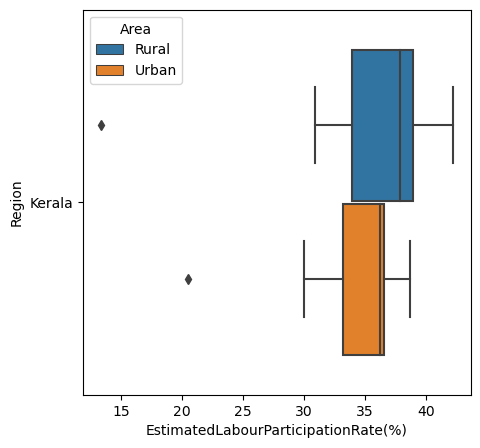

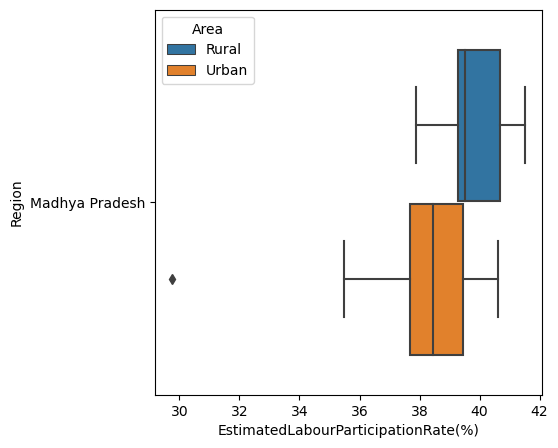

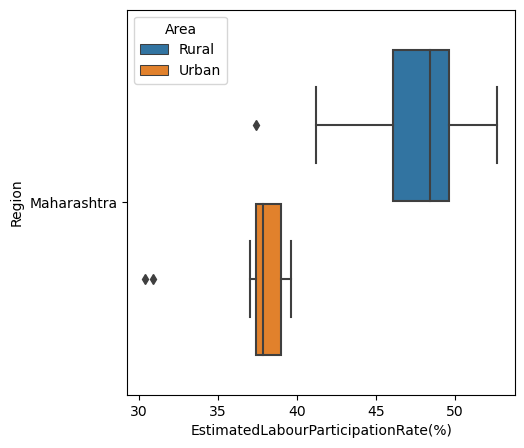

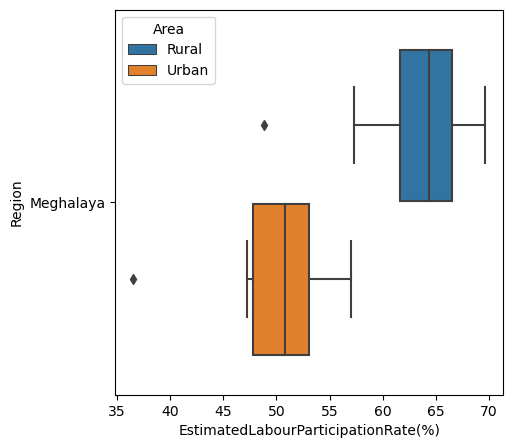

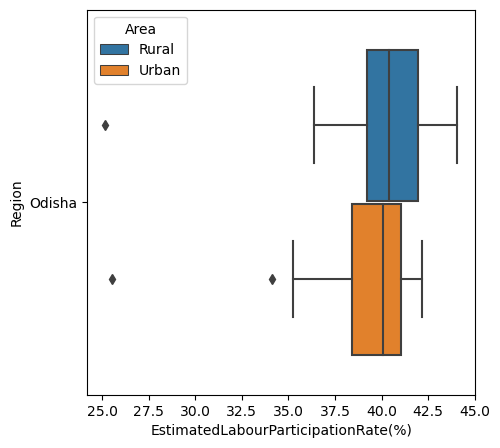

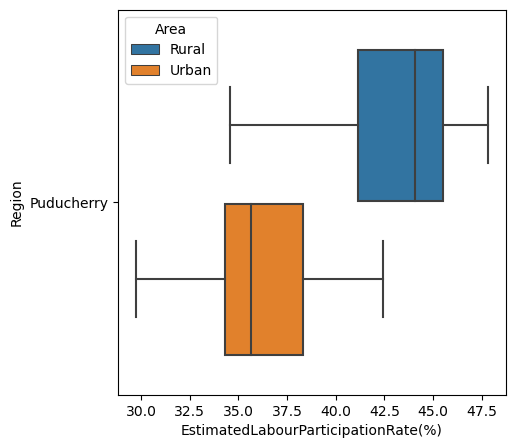

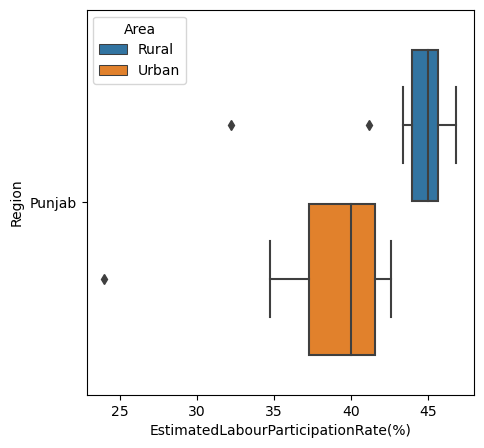

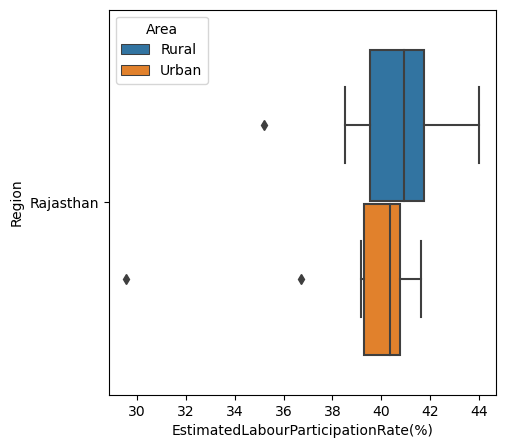

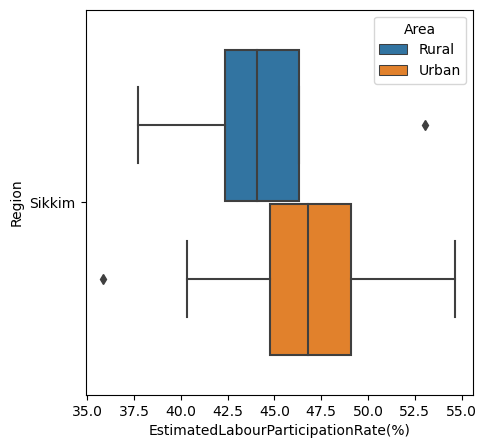

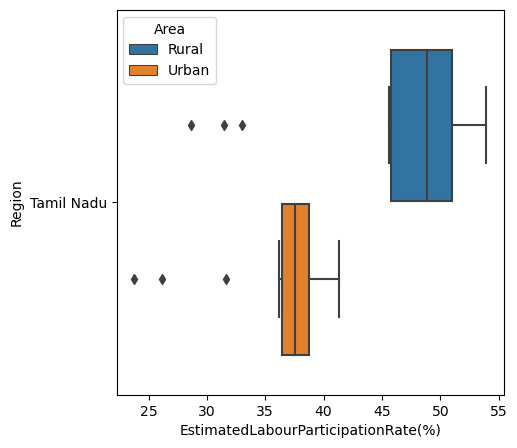

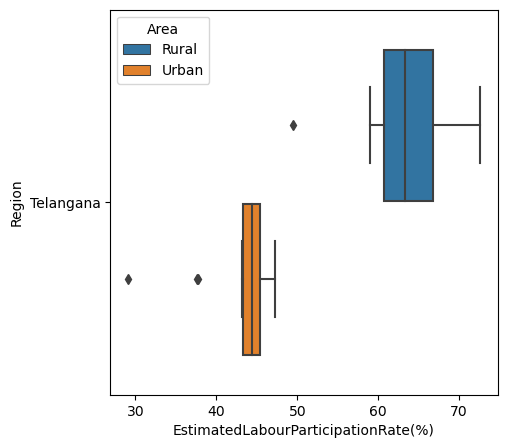

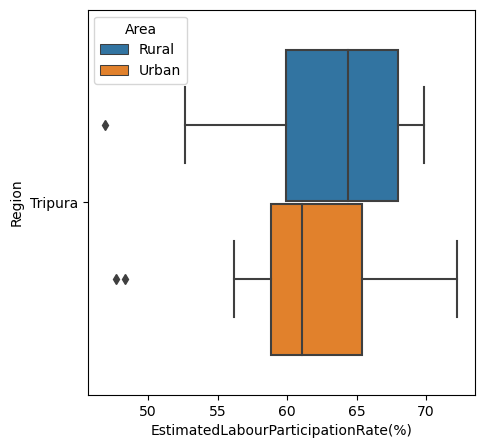

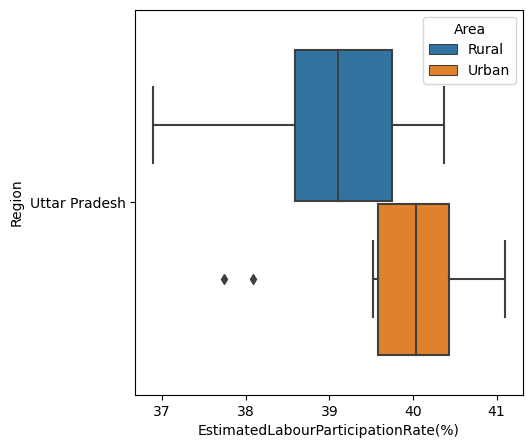

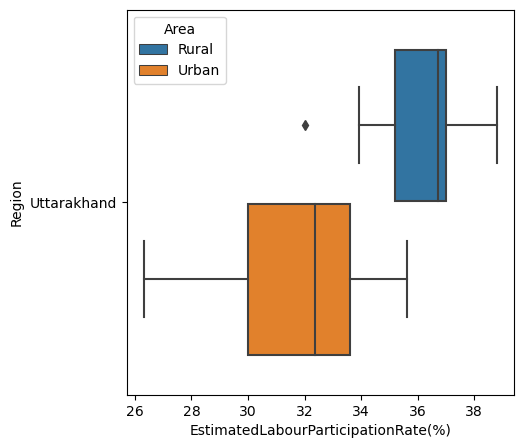

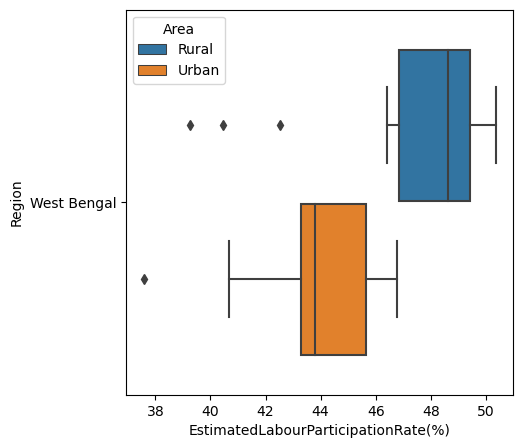

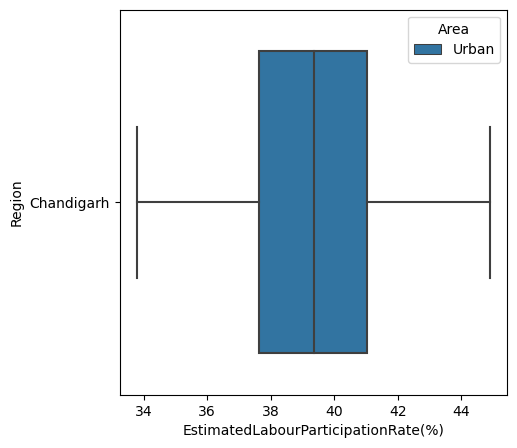

In [84]:
for state in df['Region'].unique():
        state_df=df[df['Region']==state]
        EstLabourPart(state_df)
        

<Axes: xlabel='EstimatedLabourParticipationRate(%)', ylabel='Region'>

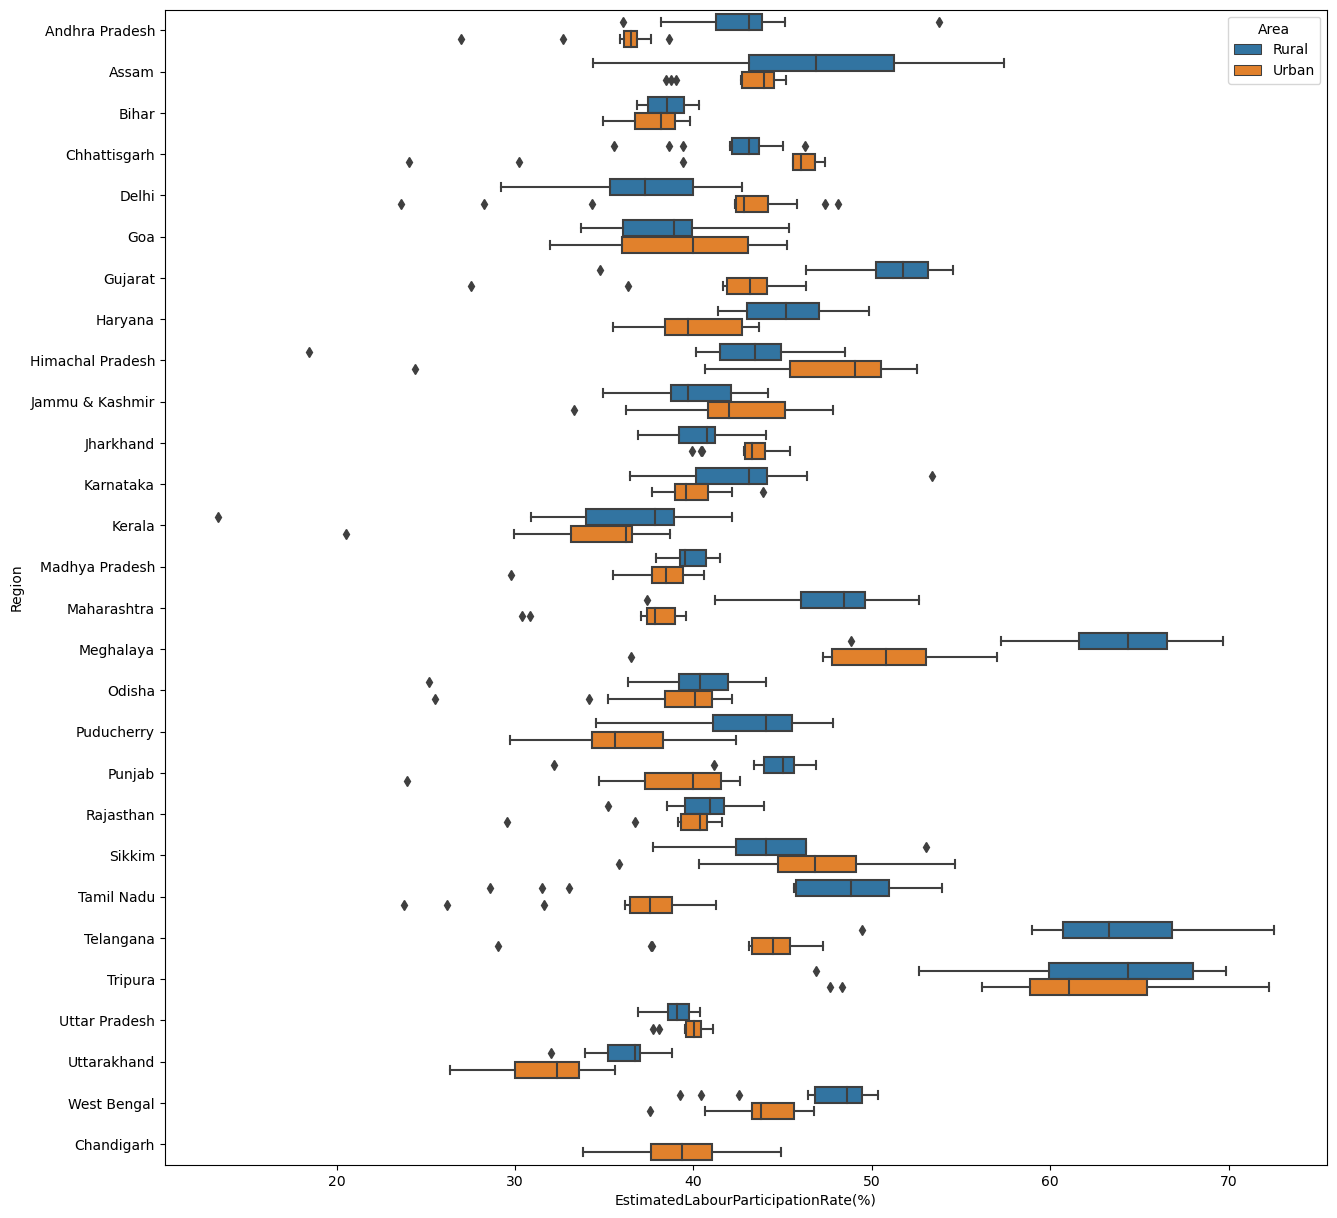

In [85]:
plt.figure(figsize=(15,15))
sns.boxplot(x='EstimatedLabourParticipationRate(%)',y='Region',hue='Area',data=df)

<Axes: xlabel='EstimatedLabourParticipationRate(%)', ylabel='Area'>

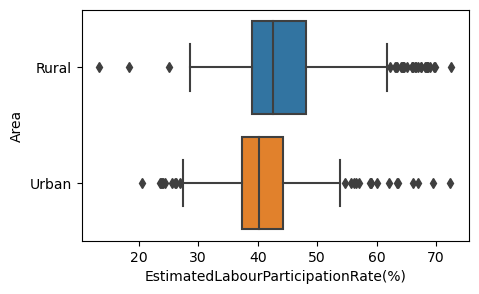

In [90]:
# 

plt.figure(figsize=(5,3))
sns.boxplot(x='EstimatedLabourParticipationRate(%)',y='Area',data=df)

<Axes: xlabel='EstimatedEmployed', ylabel='Area'>

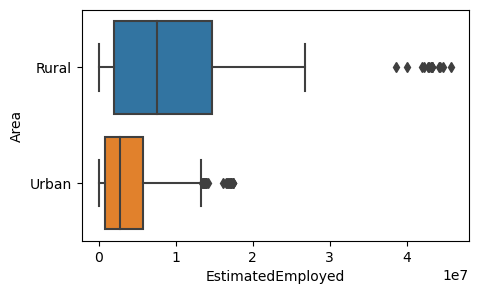

In [92]:
# 

plt.figure(figsize=(5,3))
sns.boxplot(x='EstimatedEmployed',y='Area',data=df)

<Axes: xlabel='EstimatedUnemploymentRate(%)', ylabel='Area'>

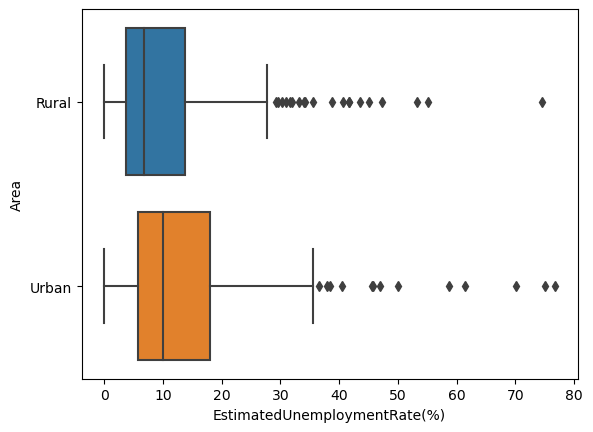

In [96]:
# 


sns.boxplot(x='EstimatedUnemploymentRate(%)',y='Area',data=df)

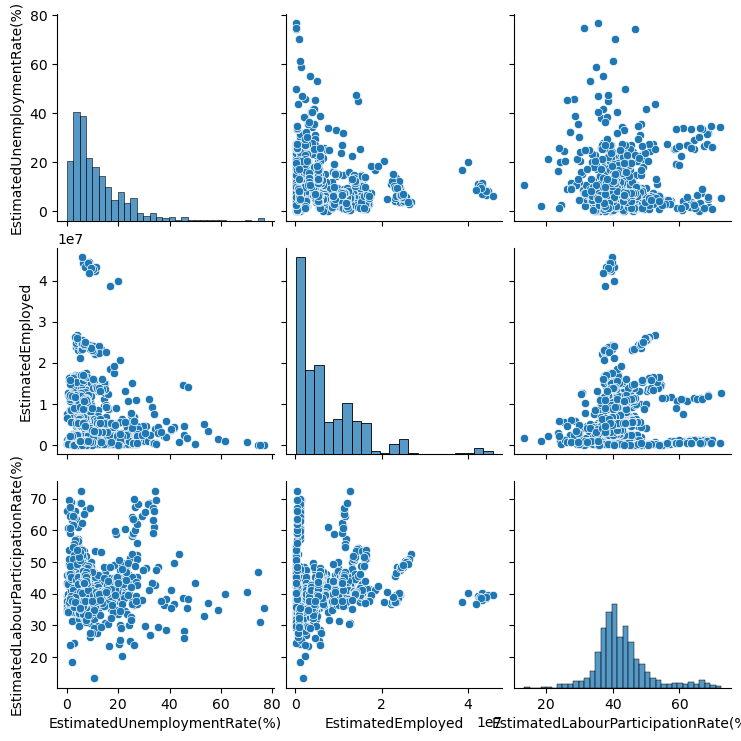

In [97]:
sns.pairplot(df)

# Second

In [100]:
df1=pd.read_csv('Unemployment_Rate.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [101]:
df1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

## Feature Engineering!!

In [104]:
df1.columns=df1.columns.str.replace(' ','')

In [106]:
df1['Region'].value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64

<Axes: xlabel='EstimatedLabourParticipationRate(%)', ylabel='Region'>

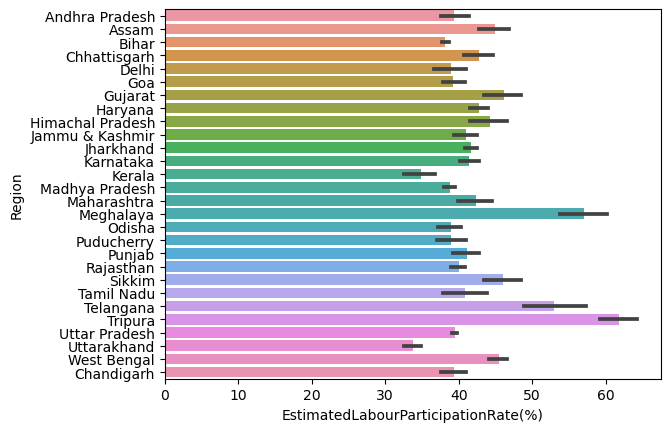

In [108]:
sns.barplot(y='Region',x='EstimatedLabourParticipationRate(%)',data=df)

<Axes: xlabel='EstimatedLabourParticipationRate(%)', ylabel='Region'>

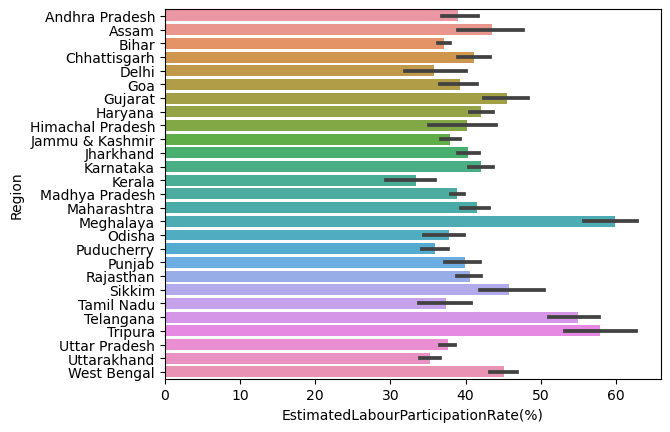

In [109]:
sns.barplot(y='Region',x='EstimatedLabourParticipationRate(%)',data=df1)

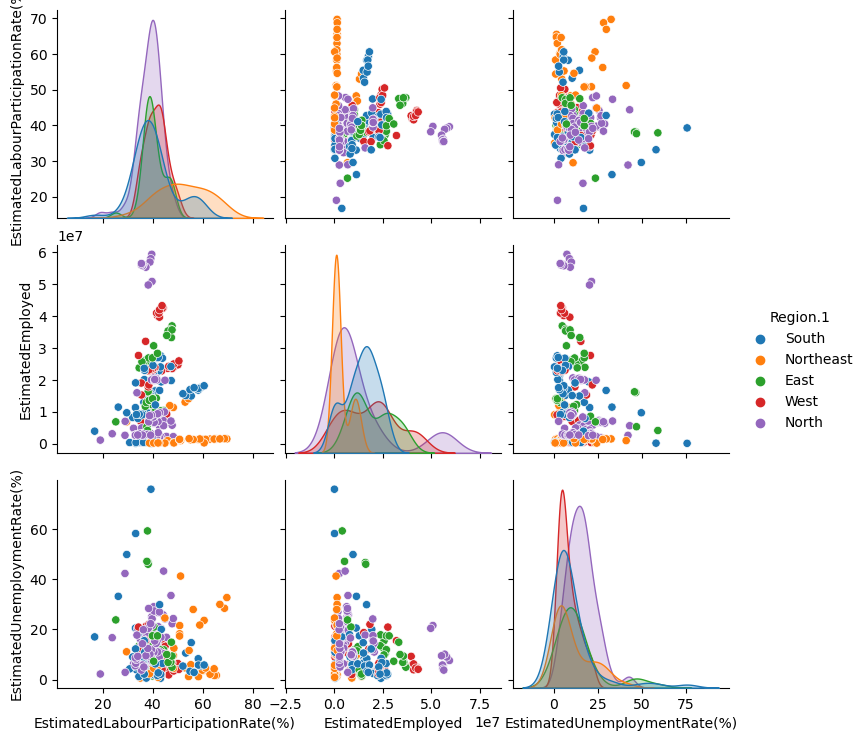

In [152]:
df_1=df1[['Region', 'Region.1', 'EstimatedLabourParticipationRate(%)', 'EstimatedEmployed', 'EstimatedUnemploymentRate(%)']]

sns.pairplot(data=df_1,hue='Region.1')